# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Settings
units = 'metric'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q='

# For sets and breaks
count = 1
setNum = 1

# Storing data
name = []
cloud = []
country = []
date = []
humid = []
lat = []
lon = []
maxTemp = []
wind = []

# Starting iteration
print('''Beginning Data Retrieval
-----------------------------''')

for city in cities:
    data = requests.get(url + city).json()

    try:
        name.append(data['name'])
        cloud.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humid.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        maxTemp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])
        print(f'Processing Record {count} of Set {setNum} | {city}')
        count = count + 1
            
    except:
        print('City not found. Skipping...')
    
    # Putting a break between each set to avoid overhaul
    if count == 51:
        count = 1
        setNum += 1
        print('------ break for 10 seconds ------')
        time.sleep(10)

print('''-----------------------------
Data Retrieval Complete
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | khatassy
Processing Record 2 of Set 1 | zhigansk
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 6 of Set 1 | hay river
Processing Record 7 of Set 1 | lazaro cardenas
Processing Record 8 of Set 1 | antalaha
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | mar del plata
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | nizhneudinsk
City not found. Skipping...
Processing Record 16 of Set 1 | requena
City not found. Skipping...
Processing Record 17 of Set 1 | tasiilaq
Processing Record 18 of Set 1 | rio gallegos
City not found. Skipping...
City not found. Skipping...
Processing Record 19 of Set 1 | avarua
City not found

Processing Record 31 of Set 4 | gallup
Processing Record 32 of Set 4 | san quintin
Processing Record 33 of Set 4 | sonqor
Processing Record 34 of Set 4 | georgiyevka
City not found. Skipping...
Processing Record 35 of Set 4 | faya
City not found. Skipping...
Processing Record 36 of Set 4 | peabiru
Processing Record 37 of Set 4 | flin flon
Processing Record 38 of Set 4 | kaeo
City not found. Skipping...
Processing Record 39 of Set 4 | penzance
Processing Record 40 of Set 4 | tefe
Processing Record 41 of Set 4 | luba
Processing Record 42 of Set 4 | shanhetun
Processing Record 43 of Set 4 | canmore
Processing Record 44 of Set 4 | pangody
Processing Record 45 of Set 4 | vostok
Processing Record 46 of Set 4 | agadir
Processing Record 47 of Set 4 | axim
Processing Record 48 of Set 4 | anloga
Processing Record 49 of Set 4 | codrington
Processing Record 50 of Set 4 | polovinnoye
------ break for 10 seconds ------
Processing Record 1 of Set 5 | tuktoyaktuk
Processing Record 2 of Set 5 | waddan


Processing Record 13 of Set 8 | markova
Processing Record 14 of Set 8 | san policarpo
City not found. Skipping...
Processing Record 15 of Set 8 | byron bay
Processing Record 16 of Set 8 | aguimes
Processing Record 17 of Set 8 | tarime
Processing Record 18 of Set 8 | northam
Processing Record 19 of Set 8 | grafton
Processing Record 20 of Set 8 | nuziders
Processing Record 21 of Set 8 | dingle
Processing Record 22 of Set 8 | nyurba
City not found. Skipping...
Processing Record 23 of Set 8 | oktyabrskoye
Processing Record 24 of Set 8 | nanning
Processing Record 25 of Set 8 | mae hong son
Processing Record 26 of Set 8 | bahia blanca
Processing Record 27 of Set 8 | neryungri
Processing Record 28 of Set 8 | bourg-en-bresse
Processing Record 29 of Set 8 | saint-augustin
Processing Record 30 of Set 8 | umm lajj
Processing Record 31 of Set 8 | ozark
Processing Record 32 of Set 8 | cabinda
City not found. Skipping...
Processing Record 33 of Set 8 | port hedland
Processing Record 34 of Set 8 | va

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    'City': name,
    'Cloudiness': cloud,
    'Country': country,
    'Date': date,
    'Humidity': humid,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': maxTemp,
    'Wind Speed': wind
})
weather_df.to_csv(output_data_file)
weather_df.count()

City          538
Cloudiness    538
Country       538
Date          538
Humidity      538
Lat           538
Lng           538
Max Temp      538
Wind Speed    538
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Khatassy,40,RU,1562530589,67,61.91,129.64,16.0,3.00
1,Zhigansk,100,RU,1562530589,96,66.77,123.37,11.5,4.30
2,Bluff,100,AU,1562530589,80,-23.58,149.07,16.0,5.44
3,Ushuaia,0,AR,1562530504,92,-54.81,-68.31,2.0,3.10
4,Bredasdorp,67,ZA,1562530590,76,-34.53,20.04,15.0,2.60


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

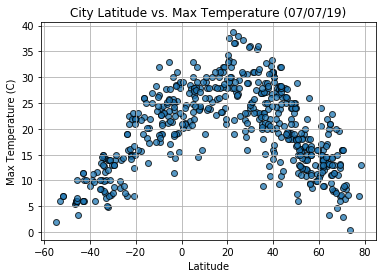

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Max Temperature (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.savefig('images/maxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

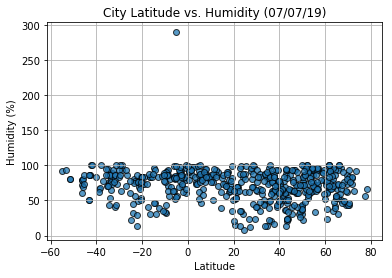

In [11]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Humidity (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('images/humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

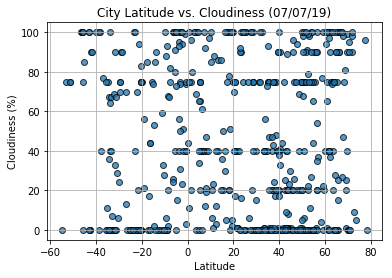

In [12]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('images/cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

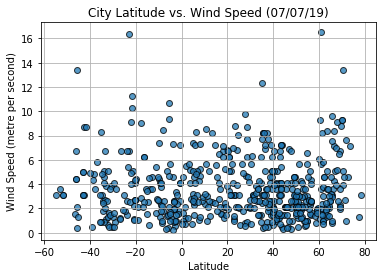

In [16]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (metre per second)')
plt.grid()
plt.savefig('images/wind.png')
plt.show()